### EDA for Student Performance

In [ ]:
# %pip install pandas numpy matplotlib seaborn

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
#Columns names
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
# Optional statistical tests
try:
    from scipy import stats
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False


SCIPY_AVAILABLE

True

In [10]:
n_rows, n_cols = df.shape

print(f'The dataset contains {n_rows} rows and {n_cols} columns.')

The dataset contains 6607 rows and 20 columns.


In [16]:
# %% 3) Missing values profile
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts=missing_counts[missing_counts > 0]
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
})

In [17]:
missing_counts

Parental_Education_Level    90
Teacher_Quality             78
Distance_from_Home          67
dtype: int64

In [18]:
missing_pct

Parental_Education_Level    1.36
Teacher_Quality             1.18
Distance_from_Home          1.01
dtype: float64

In [19]:
missing_table

,missing_count,missing_pct
Parental_Education_Level,90,1.36
Teacher_Quality,78,1.18
Distance_from_Home,67,1.01


In [21]:
# %% 4) Unique values by column
unique_counts = df.nunique(dropna=False).sort_values(ascending=False)
unique_table = pd.DataFrame({"unique_values": unique_counts})

In [22]:
unique_table

,unique_values
Previous_Scores,51
Exam_Score,45
Attendance,41
Hours_Studied,41
Tutoring_Sessions,9
Sleep_Hours,7
Physical_Activity,7
Teacher_Quality,4
Parental_Education_Level,4
Distance_from_Home,4


In [23]:
# %% 5) Basic summaries
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [24]:
numeric_cols, categorical_cols

(['Hours_Studied',
  'Attendance',
  'Sleep_Hours',
  'Previous_Scores',
  'Tutoring_Sessions',
  'Physical_Activity',
  'Exam_Score'],
 ['Parental_Involvement',
  'Access_to_Resources',
  'Extracurricular_Activities',
  'Motivation_Level',
  'Internet_Access',
  'Family_Income',
  'Teacher_Quality',
  'School_Type',
  'Peer_Influence',
  'Learning_Disabilities',
  'Parental_Education_Level',
  'Distance_from_Home',
  'Gender'])

In [25]:
# %% 6) Correlations (numeric only)
if numeric_cols:
    corr_pearson = df[numeric_cols].corr(method="pearson")
    corr_spearman = df[numeric_cols].corr(method="spearman")
    
else:
    corr_pearson = pd.DataFrame()
    corr_spearman = pd.DataFrame()

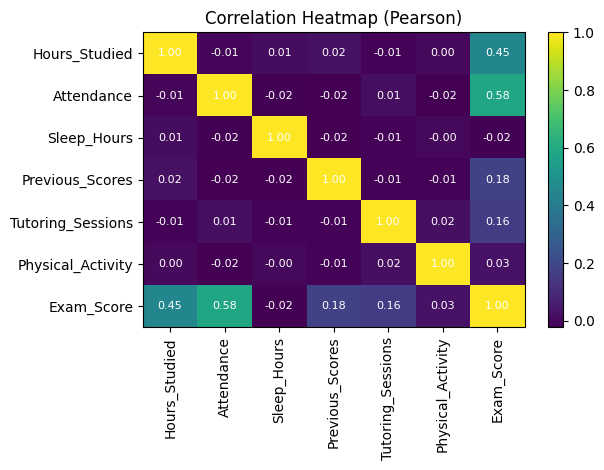

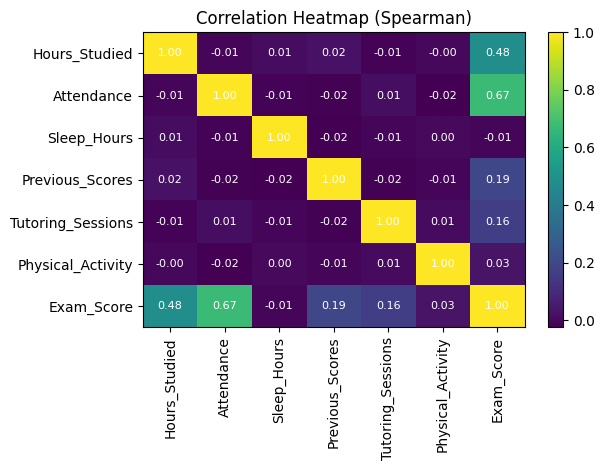

In [27]:
# %% 7) Heatmap helper (matplotlib only, no seaborn)
def plot_heatmap(matrix: pd.DataFrame, title: str):
    if matrix.empty:
        print(f"[skip] Empty matrix for: {title}")
        return
    
    plt.figure()
    plt.imshow(matrix.values, aspect="auto", cmap="viridis")
    plt.title(title)
    plt.xticks(ticks=np.arange(matrix.shape[1]), labels=matrix.columns, rotation=90)
    plt.yticks(ticks=np.arange(matrix.shape[0]), labels=matrix.index)
    plt.colorbar()

    # 🔹 Додаємо числа в центр клітинок
    for i in range(matrix.shape[0]):       # рядки
        for j in range(matrix.shape[1]):   # стовпці
            value = matrix.iat[i, j]
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='white', fontsize=8)

    plt.tight_layout()
    plt.show()

plot_heatmap(corr_pearson, "Correlation Heatmap (Pearson)")
plot_heatmap(corr_spearman, "Correlation Heatmap (Spearman)")


In [28]:
def detect_outliers(df: pd.DataFrame, method: str = "IQR", visualize: bool = True):
    """
    Виявляє викиди у всіх числових стовпцях DataFrame.
    method: "IQR" або "Z-score"
    visualize: якщо True — будує boxplot для кожного стовпця
    """

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_indices = {}

    for col in numeric_cols:
        data = df[col].dropna()

        if method == "IQR":
            Q1 = np.percentile(data, 25)
            Q3 = np.percentile(data, 75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower) | (df[col] > upper)].index

        elif method == "Z-score":
            mean = np.mean(data)
            std = np.std(data)
            z_scores = (data - mean) / std
            outliers = df[np.abs(z_scores) > 3].index

        else:
            raise ValueError("method має бути 'IQR' або 'Z-score'")

        outlier_indices[col] = list(outliers)

        if visualize:
            plt.figure(figsize=(6, 2))
            sns.boxplot(x=df[col], color="skyblue")
            plt.title(f"Boxplot: {col}")
            plt.tight_layout()
            plt.show()

        print(f"🔹 {col}: знайдено {len(outliers)} викидів")

    return outlier_indices

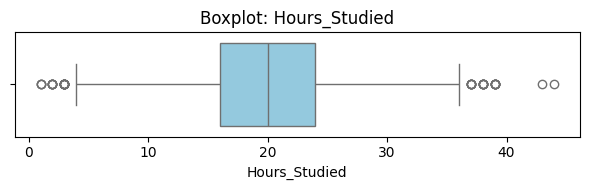

🔹 Hours_Studied: знайдено 25 викидів


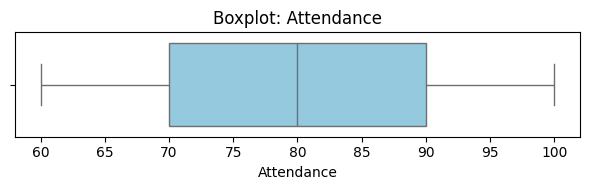

🔹 Attendance: знайдено 0 викидів


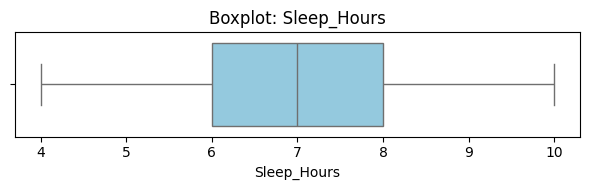

🔹 Sleep_Hours: знайдено 0 викидів


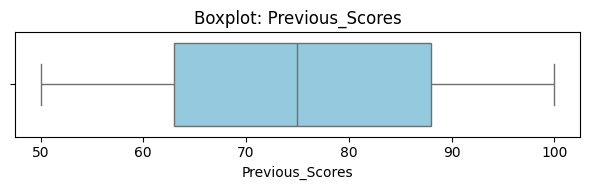

🔹 Previous_Scores: знайдено 0 викидів


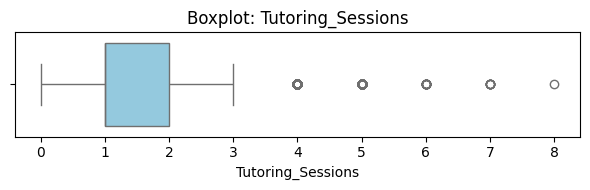

🔹 Tutoring_Sessions: знайдено 26 викидів


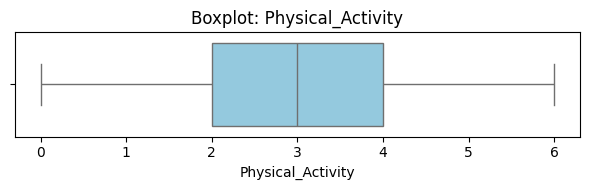

🔹 Physical_Activity: знайдено 0 викидів


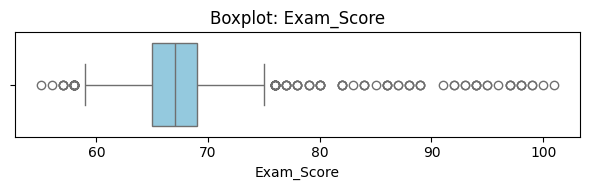

🔹 Exam_Score: знайдено 52 викидів

Індекси викидів по кожному стовпцю:
Hours_Studied: [209, 262, 478, 1591, 1615, 1957, 1971, 2024, 2305, 2506, 2521, 2895, 2947, 3454, 3716, 3982, 4198, 4725, 4779, 4870, 4997, 5157, 5224, 5796, 5846]
Attendance: []
Sleep_Hours: []
Previous_Scores: []
Tutoring_Sessions: [679, 724, 1462, 1548, 1848, 2040, 2198, 2231, 2237, 2265, 2346, 2699, 2718, 3388, 3617, 3880, 3894, 4009, 4091, 4247, 4697, 4799, 5680, 5855, 6061, 6485]
Physical_Activity: []
Exam_Score: [94, 113, 217, 404, 529, 558, 560, 637, 770, 836, 919, 1099, 1101, 1107, 1109, 1351, 1525, 1607, 1844, 1863, 1957, 2076, 2292, 2421, 2425, 2513, 2595, 2687, 2904, 2954, 3124, 3141, 3364, 3457, 3579, 3924, 3932, 4192, 4254, 4297, 4355, 4405, 4531, 4583, 4666, 4779, 5125, 5966, 5989, 6347, 6393, 6522]


In [43]:
outliers = detect_outliers(df, method="Z-score", visualize=True)

print("\nІндекси викидів по кожному стовпцю:")
for col, idx in outliers.items():
    print(f"{col}: {idx}")

In [46]:
out1 = [209, 262, 478, 1591, 1615, 1957, 1971, 2024, 2305, 2506, 2521, 2895, 2947, 3454, 3716, 3982, 4198, 4725, 4779, 4870, 4997, 5157, 5224, 5796, 5846]
out2 = [679, 724, 1462, 1548, 1848, 2040, 2198, 2231, 2237, 2265, 2346, 2699, 2718, 3388, 3617, 3880, 3894, 4009, 4091, 4247, 4697, 4799, 5680, 5855, 6061, 6485]
out3 = [94, 113, 217, 404, 529, 558, 560, 637, 770, 836, 919, 1099, 1101, 1107, 1109, 1351, 1525, 1607, 1844, 1863, 1957, 2076, 2292, 2421, 2425, 2513, 2595, 2687, 2904, 2954, 3124, 3141, 3364, 3457, 3579, 3924, 3932, 4192, 4254, 4297, 4355, 4405, 4531, 4583, 4666, 4779, 5125, 5966, 5989, 6347, 6393, 6522]

outs = list(set(out1 + out2 + out3))

outs

[5125,
 1548,
 529,
 2076,
 3617,
 2595,
 5157,
 558,
 5680,
 560,
 3124,
 1591,
 4666,
 3141,
 1607,
 1099,
 1101,
 1615,
 1107,
 1109,
 3579,
 4697,
 94,
 4192,
 4198,
 5224,
 113,
 4725,
 637,
 2687,
 3716,
 2699,
 2198,
 4247,
 2718,
 4254,
 5796,
 679,
 4779,
 2231,
 2237,
 4799,
 4297,
 6347,
 209,
 724,
 5846,
 2265,
 217,
 5855,
 2292,
 6393,
 2305,
 770,
 4355,
 262,
 4870,
 3364,
 3880,
 2346,
 1844,
 4405,
 3894,
 1848,
 3388,
 836,
 1351,
 1863,
 5966,
 2895,
 3924,
 6485,
 2904,
 3932,
 5989,
 2421,
 2425,
 6522,
 3454,
 3457,
 2947,
 4997,
 2954,
 3982,
 404,
 919,
 1957,
 4009,
 6061,
 1971,
 4531,
 1462,
 2506,
 2513,
 2521,
 478,
 4583,
 2024,
 1525,
 2040,
 4091]

In [47]:
df2 = df.drop(index=outs).reset_index(drop=True)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6506 non-null   int64 
 1   Attendance                  6506 non-null   int64 
 2   Parental_Involvement        6506 non-null   object
 3   Access_to_Resources         6506 non-null   object
 4   Extracurricular_Activities  6506 non-null   object
 5   Sleep_Hours                 6506 non-null   int64 
 6   Previous_Scores             6506 non-null   int64 
 7   Motivation_Level            6506 non-null   object
 8   Internet_Access             6506 non-null   object
 9   Tutoring_Sessions           6506 non-null   int64 
 10  Family_Income               6506 non-null   object
 11  Teacher_Quality             6429 non-null   object
 12  School_Type                 6506 non-null   object
 13  Peer_Influence              6506 non-null   obje

In [50]:
df2.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6506.000000,6506.000000,6506.000000,6506.000000,6506.000000,6506.000000,6506.000000
mean,19.945589,79.956502,7.031817,75.051645,1.473870,2.968952,67.042883
std,5.878408,11.540209,1.467056,14.387867,1.195306,1.028998,3.312127
min,3.000000,60.000000,4.000000,50.000000,0.000000,0.000000,56.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,87.000000,2.000000,4.000000,69.000000
max,37.000000,100.000000,10.000000,100.000000,5.000000,6.000000,78.000000


In [ ]:

df.loc[out1,'Hours_Studied']


In [54]:
for col in  categorical_cols:
    print(df[col].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
Distance_from_Home
Near        3884
Moderate    1998
Far          